In [1]:
##########################################
# Assignment 3.
# Q1. a)
# Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. 
#
# 1. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables 
# in the data set. 
# 2. Separate the target attribute for regression. 
# 3. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data 
#    partition will be used for cross-validation on various tasks.

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl

In [3]:
community_df = pd.read_csv('communities.csv')

In [4]:
community_df.head(3)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43


In [5]:
community_df.shape

(1994, 100)

In [6]:
# The two identifier attributes "state" and "community name" should be excluded for the regression task.
del community_df['state']
del community_df['communityname']
community_df.head(3)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43


In [7]:
community_df=community_df.replace('?', 0)

In [8]:
## Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables 
pd.set_option('display.max_rows', None) # Display all variables

# Describe give mean, median, SD, min and Max.
community_df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [9]:
pd.set_option('display.max_rows', 15)

In [10]:
# The target attribute for regression purposes is "ViolentCrimesPerPop".
# Q1.a.2. Separate the target attribute for regression.

y = community_df['ViolentCrimesPerPop']


In [11]:
X = community_df.loc[:, community_df.columns != 'ViolentCrimesPerPop']

In [12]:
X.head(3)
X.replace('?',0)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.01,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.04,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33


In [13]:
y.head(3)

0    0.20
1    0.67
2    0.43
Name: ViolentCrimesPerPop, dtype: float64

In [14]:
# Q1.a. 
# 3. Build the training and testing dataset
# Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data 
# partition will be used for cross-validation on various tasks.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40,  shuffle=True)

In [15]:
#Q1 b.
# 1. Perform standard linear regression on data using the closed form solution implementation 
# (not the scikit-learn implementation). 
# 2. Compute the RMSE value on the full training data (the 80% partition). 
# 3. Plot the correlation between the predicted and actual values of the target attribute. 
# 4. Display the obtained regression coefficients (weights) and plot them using matplotlib. 
# 5. Perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE 
# (for cross validation, you should use the KFold module from sklearn.model_selection).

In [16]:
# Q1.b. 1. Perform standard linear regression on data using the closed form solution implementation

In [50]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [68]:
# convert to float matrix avoid error -can't multiply sequence 
w = standRegres(X.astype('float'),y)

In [66]:
print(w)

[[ 0.12]
 [-0.03]
 [ 0.24]
 [-0.  ]
 [ 0.01]
 [ 0.1 ]
 [ 0.19]
 [-0.09]
 [-0.27]
 [ 0.16]
 [-0.23]
 [ 0.05]
 [-0.18]
 [-0.13]
 [ 0.05]
 [-0.13]
 [ 0.1 ]
 [ 0.03]
 [-0.07]
 [ 0.25]
 [ 0.1 ]
 [-0.3 ]
 [-0.03]
 [-0.03]
 [ 0.02]
 [ 0.04]
 [ 0.03]
 [ 0.09]
 [-0.15]
 [-0.11]
 [ 0.08]
 [ 0.13]
 [ 0.01]
 [ 0.27]
 [-0.04]
 [-0.01]
 [ 0.53]
 [ 0.25]
 [ 0.24]
 [-0.62]
 [-0.16]
 [ 0.07]
 [-0.27]
 [-0.03]
 [ 0.  ]
 [ 0.06]
 [-0.19]
 [-0.13]
 [ 0.15]
 [-0.14]
 [ 0.03]
 [ 0.03]
 [-0.09]
 [ 0.04]
 [-0.03]
 [-0.24]
 [ 0.5 ]
 [-0.24]
 [ 0.04]
 [-0.12]
 [ 0.08]
 [-0.28]
 [ 0.66]
 [-0.  ]
 [-0.21]
 [-0.69]
 [ 0.19]
 [ 0.15]
 [ 0.04]
 [ 0.19]
 [-0.04]
 [ 0.6 ]
 [ 0.04]
 [-0.07]
 [-0.02]
 [ 0.02]
 [-0.02]
 [-0.39]
 [ 0.3 ]
 [ 0.01]
 [-0.26]
 [-0.02]
 [-0.08]
 [ 0.38]
 [ 0.05]
 [-0.04]
 [-0.08]
 [ 0.14]
 [ 0.18]
 [ 0.16]
 [ 0.02]
 [-0.02]
 [ 0.03]
 [ 0.  ]
 [ 0.02]
 [-0.  ]
 [-0.04]]


In [19]:
# Q1.b. 1. 
## Perform standard linear regression on data using the closed form solution implementation 

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
x=np.array(X)

In [21]:
x[0][1]

0.33

In [22]:
# Let's see predictions for the first 10 instances and compare to actual ViolentCrimesPerPop values

x=np.array(X)
for i in range(10):
    pred = linreg.predict(np.array([x[i]]))[0]
    print("%2d \t %2.2f \t %2.2f" % (i, pred, y[i]))

 0 	 0.17 	 0.20
 1 	 0.29 	 0.67
 2 	 0.38 	 0.43
 3 	 0.32 	 0.12
 4 	 -0.02 	 0.03
 5 	 0.23 	 0.14
 6 	 0.09 	 0.03
 7 	 0.44 	 0.55
 8 	 0.24 	 0.53
 9 	 0.00 	 0.15


In [23]:
# Q1.b. 2. 
# Compute the RMSE value on the full training data (the 80% partition). 

In [24]:
# First, let's compute errors on all training instances

p = linreg.predict(x) # p is the array of predicted values

# Now we can constuct an array of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

0    0.034307
1    0.379567
2    0.046338
3    0.202607
4    0.050899
5    0.090129
6    0.057949
7    0.107434
8    0.292336
9    0.145265
Name: ViolentCrimesPerPop, dtype: float64


In [25]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12887344138167703


In [26]:
print("Linear Regression Intercept: ", linreg.intercept_)

Linear Regression Intercept:  0.5879279024649247


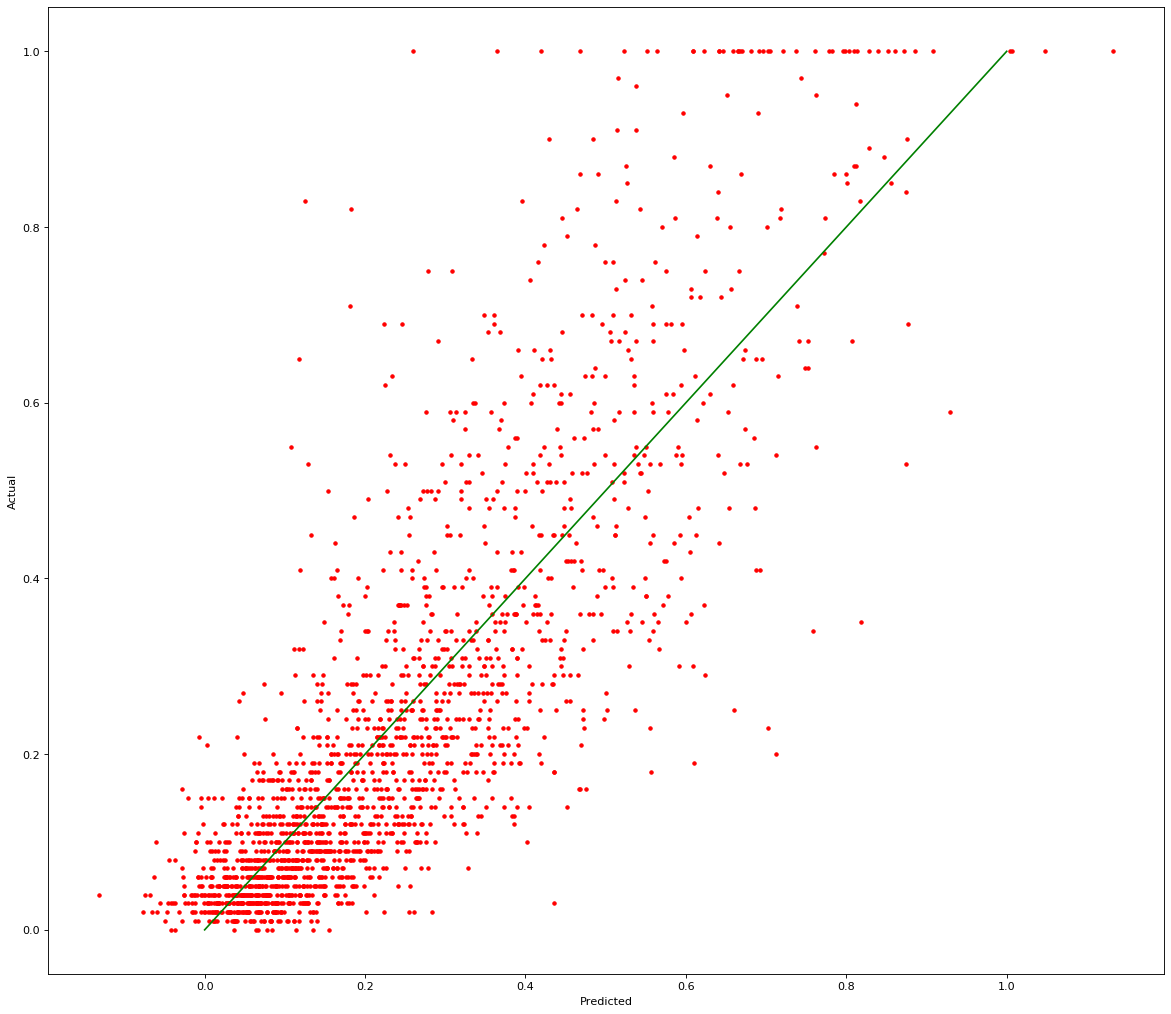

In [27]:
#
# Q1, b. 3. Plot the correlation between the predicted and actual values of the target attribute.
#
%matplotlib inline
fig=pl.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
pl.plot(p, y,'ro', markersize=3)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')

pl.show()

In [28]:
# Q1. b. 4.Display the obtained regression coefficients (weights) and plot them using matplotlib. 
# Print all regression coefficients
for i in range(len(x[1])):
    print("%25s \t  %2.2f" % (X.columns[i], linreg.coef_[i]))
    

               population 	  0.13
            householdsize 	  -0.03
             racepctblack 	  0.21
             racePctWhite 	  -0.04
             racePctAsian 	  -0.01
              racePctHisp 	  0.06
              agePct12t21 	  0.12
              agePct12t29 	  -0.22
              agePct16t24 	  -0.15
               agePct65up 	  0.05
                numbUrban 	  -0.24
                 pctUrban 	  0.05
                medIncome 	  -0.20
                 pctWWage 	  -0.21
             pctWFarmSelf 	  0.05
               pctWInvInc 	  -0.18
               pctWSocSec 	  0.06
              pctWPubAsst 	  0.01
               pctWRetire 	  -0.09
                medFamInc 	  0.27
                perCapInc 	  0.10
              whitePerCap 	  -0.33
              blackPerCap 	  -0.03
             indianPerCap 	  -0.04
              AsianPerCap 	  0.02
              OtherPerCap 	  0.04
               HispPerCap 	  0.03
              NumUnderPov 	  0.13
           PctPopUnderPov 	  -0.19


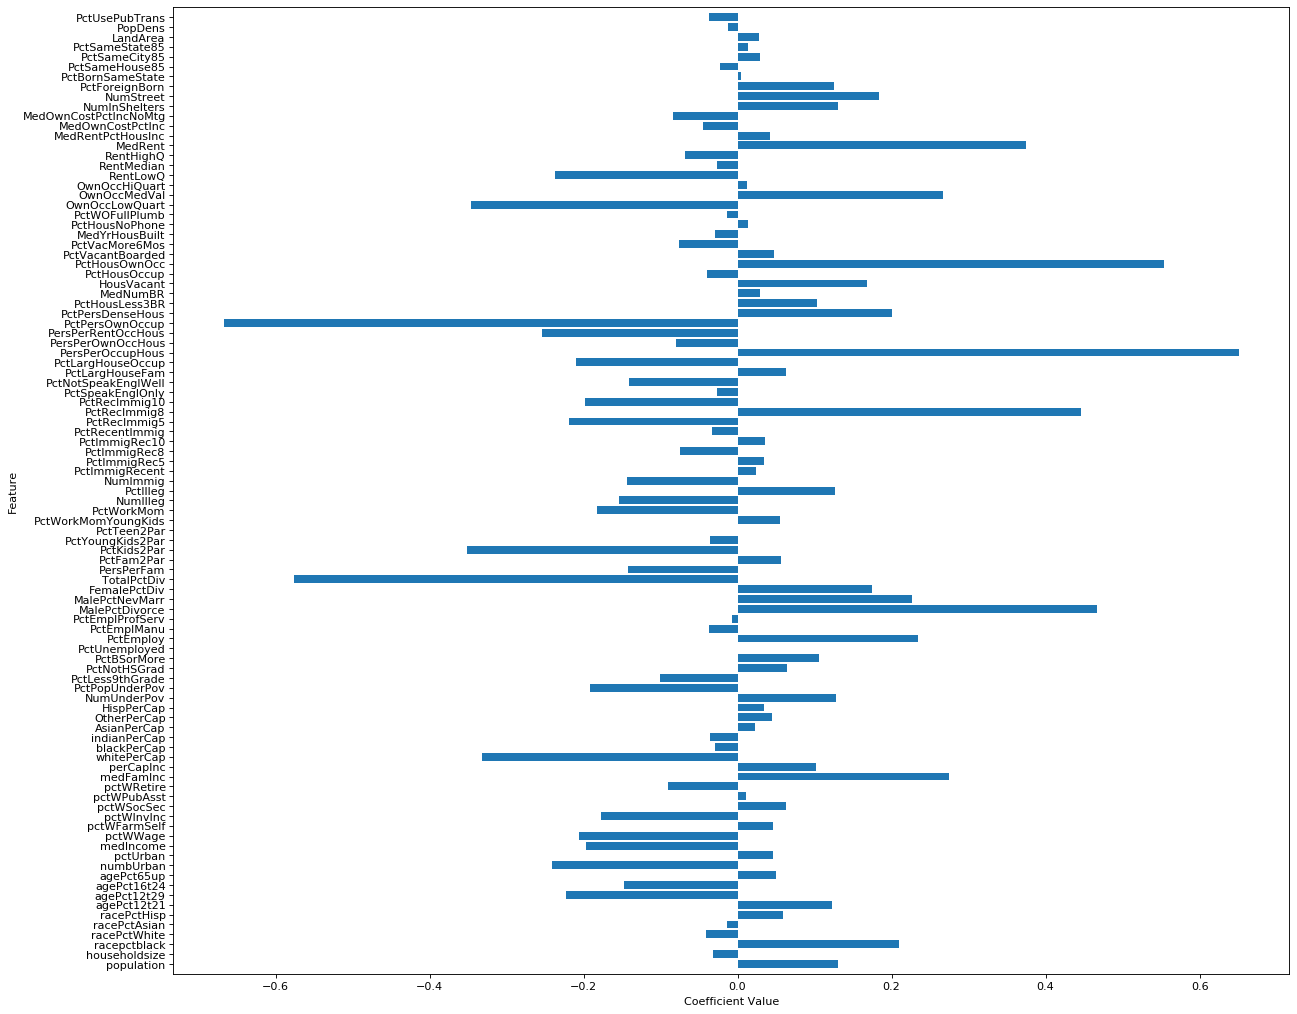

In [29]:
# Q1. b. 4. Plot regression coefficients using matplotlib. 

%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    fig=pl.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    pl.barh(range(n_features), model.coef_[:], align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)


plot_coefficients(linreg, len(X.columns), X.columns)


In [30]:
# Q1.b. 5. Perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE 
# (for cross validation, you should use the KFold module from sklearn.model_selection).

In [31]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22, shuffle=True)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        model.fit(X[train],y[train])
        p = model.predict(x[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [32]:
rmse_10cv = cross_validate(linreg, x, y, 10, verbose=True)

Fold  1 RMSE: 0.1165
Fold  2 RMSE: 0.1350
Fold  3 RMSE: 0.1389
Fold  4 RMSE: 0.1433
Fold  5 RMSE: 0.1386
Fold  6 RMSE: 0.1246
Fold  7 RMSE: 0.1310
Fold  8 RMSE: 0.1464
Fold  9 RMSE: 0.1475
Fold 10 RMSE: 0.1376


In [33]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1359


In [34]:
#Q1.c. Feature Selection:
# Select the top 30% of the most important features using k-fold cross-validation on the training data (suggested k=5)
#

In [35]:
from sklearn import feature_selection

In [36]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [37]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(list(X.columns))
print(fs.get_support())
print(fs.scores_)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'Pers

In [38]:
print(X.columns[fs.get_support()].values)

['racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc' 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov'
 'PctLess9thGrade' 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg' 'PctIlleg' 'PctLargHouseFam' 'PctPersOwnOccup'
 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant' 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone' 'NumInShelters']


In [69]:
## most informative variables and their weights ###

for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print("%25s \t %3.2f" % (X.columns.values[i], fs.scores_[i]))

             racepctblack 	 1069.50
             racePctWhite 	 1432.14
                medIncome 	 330.81
               pctWInvInc 	 758.38
              pctWPubAsst 	 780.25
                medFamInc 	 360.76
              NumUnderPov 	 390.99
           PctPopUnderPov 	 567.40
          PctLess9thGrade 	 343.61
             PctNotHSGrad 	 502.10
            PctUnemployed 	 532.25
           MalePctDivorce 	 565.22
             FemalePctDiv 	 661.05
              TotalPctDiv 	 653.11
               PctFam2Par 	 1552.54
              PctKids2Par 	 1905.73
         PctYoungKids2Par 	 1266.05
              PctTeen2Par 	 1226.83
                 NumIlleg 	 448.93
                 PctIlleg 	 1974.82
          PctLargHouseFam 	 274.24
          PctPersOwnOccup 	 600.15
         PctPersDenseHous 	 417.75
           PctHousLess3BR 	 452.78
               HousVacant 	 342.25
            PctHousOwnOcc 	 445.82
         PctVacantBoarded 	 457.80
           PctHousNoPhone 	 509.50
            N

In [40]:
print(X_train_fs)

[[0.76 0.39 0.16 ... 0.29 0.81 0.0]
 [0.03 0.96 0.15 ... 0.19 0.42 0.0]
 [0.01 0.99 0.48 ... 0.03 0.03 0.0]
 ...
 [0.03 0.46 0.16 ... 0.22 0.28 0.0]
 [0.01 0.98 0.33 ... 0.04 0.05 0.0]
 [0.01 0.01 0.3 ... 0.21 0.19 0.0]]


In [78]:
# plot the model's mean absolute error values  on cross-validation using only the selected features
from sklearn.metrics import mean_squared_error
selected_flds =X.columns[fs.get_support()].values

In [83]:
selected_flds

array(['racepctblack', 'racePctWhite', 'medIncome', 'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'NumIlleg', 'PctIlleg',
       'PctLargHouseFam', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOwnOcc',
       'PctVacantBoarded', 'PctHousNoPhone', 'NumInShelters'], dtype=object)

In [91]:
sel_X=community_df[selected_flds]
sel_X.replace('?', 0)
y = community_df['ViolentCrimesPerPop']
sel_X.shape

(1994, 29)

In [96]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(sel_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
sel_x=np.array(sel_X)

In [98]:
# Let's see predictions for the first 10 instances and compare to actual MEDV values
for i in range(10):
    pred = linreg2.predict(np.array([sel_x[i]]))[0]
    print("%2d \t %2.2f \t %2.2f" % (i, pred, y[i]))

 0 	 0.21 	 0.20
 1 	 0.30 	 0.67
 2 	 0.39 	 0.43
 3 	 0.40 	 0.12
 4 	 0.00 	 0.03
 5 	 0.19 	 0.14
 6 	 0.04 	 0.03
 7 	 0.45 	 0.55
 8 	 0.24 	 0.53
 9 	 0.11 	 0.15


In [101]:
# Find model's mean absolute error values on cross-validation using only the selected features
# MAE = Average of All absolute errors
p = linreg.predict(sel_x)
err = abs(p-y)
# List error on the first 10 predictions
print(err[:10])

0    0.009677
1    0.365916
2    0.042273
3    0.277479
4    0.026496
5    0.046596
6    0.008293
7    0.104108
8    0.289127
9    0.041364
Name: ViolentCrimesPerPop, dtype: float64


In [102]:
print ("MAE =", np.mean(err))

MAE = 0.09512383209549569


In [ ]:
# plot the model's mean absolute error values

In [ ]:
#Q1. d.
#1.  Perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model